<a href="https://colab.research.google.com/github/shaimathamer/Data-anlysis/blob/main/diabeates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OUR STEPS**

– Problem 

– Basic data exploration 

– Visualization 

– our insights 

#1-PROBLEM
 predict if the person has diabetes or not


# Importing libaraies

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 **Details about the dataset:**

1. Pregnancies decribes the number of times the person has been pregnant.
2. Gluose describes the blood glucose level on testing.
3. Blood pressure describes the diastolic blood pressure.
4. Skin Thickenss describes the skin fold thickness of the triceps.
5. Insulin describes the amount of insulin in a 2hour serum test.
6. BMI describes his body mass index.
7. DiabetesPedigreeFunction describes the family history of the person.
8. Age describes the age of the person
9. Patient_no describes number id 
10. Outcome describes if the person has diabetes or not.

In [ ]:
df = pd.read_csv('diabetes.csv')


# *let's explore.....*

# Basic Data Exploration    (Understanding the Dataset)
We will check the below things:

– head of the dataset

– the shape of the dataset

– datatypes for every column 

– summary of the dataset

– Get rid of garbage


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,patient_no,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,1,35,0,33.6,0.627,50,1
1,1,85,66,2,29,0,26.6,0.351,31,0
2,8,183,64,3,0,0,23.3,0.672,32,1
3,1,89,66,4,23,94,28.1,0.167,21,0
4,0,137,40,5,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,patient_no,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,764,48,180,32.9,0.171,63,0
764,2,122,70,765,27,0,36.8,0.340,27,0
765,5,121,72,766,23,112,26.2,0.245,30,0
766,1,126,60,767,0,0,30.1,0.349,47,1
767,1,93,70,768,31,0,30.4,0.315,23,0


In [ ]:
# Take a sample of 5
df.sample(5)

,Pregnancies,Glucose,BloodPressure,patient_no,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
674,8,91,82,675,0,0,35.6,0.587,68,0
569,0,121,66,570,30,165,34.3,0.203,33,1
564,0,91,80,565,0,0,32.4,0.601,27,0
732,2,174,88,733,37,120,44.5,0.646,24,1
747,1,81,74,748,41,57,46.3,1.096,32,0


In [ ]:
df.shape

(768, 10)

In [ ]:
df.info()  #info() is used to check the Information about the data and the datatypes of each respective attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   patient_no                768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [ ]:
df.describe().T #The described method will help to see how data has been spread for numerical values.
              # We can clearly see the minimum value, mean values, different percentile values, and maximum values.


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
patient_no,768.0,384.500000,221.846794,1.000,192.75000,384.5000,576.25000,768.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Target

In [ ]:
df.columns

In [ ]:
var_names=df.columns[:-1]
target= df.columns[-1]

###***Garbage in Garbage out***








# Garbage

###1.Drop not related values.
###2.Drop missing values. 
###3.Drop invalid values.
###4.Drop outlier.

Drop not related values

In [ ]:
# df=df.drop(["patient_no"],axis=0)    if i want to drop row
df=df.drop(["patient_no"],axis=1)      # if i want to drop column 
df.shape

(768, 9)

Drop missing values

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Invalid data

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df.loc[(df["Outcome"]==0), col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df.loc[(df["Outcome"]==1), col].median()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outlier

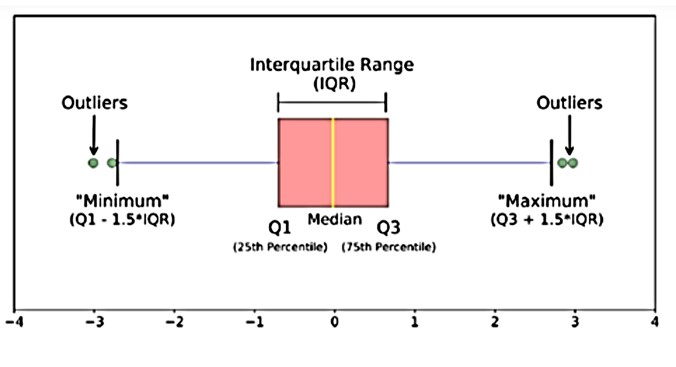

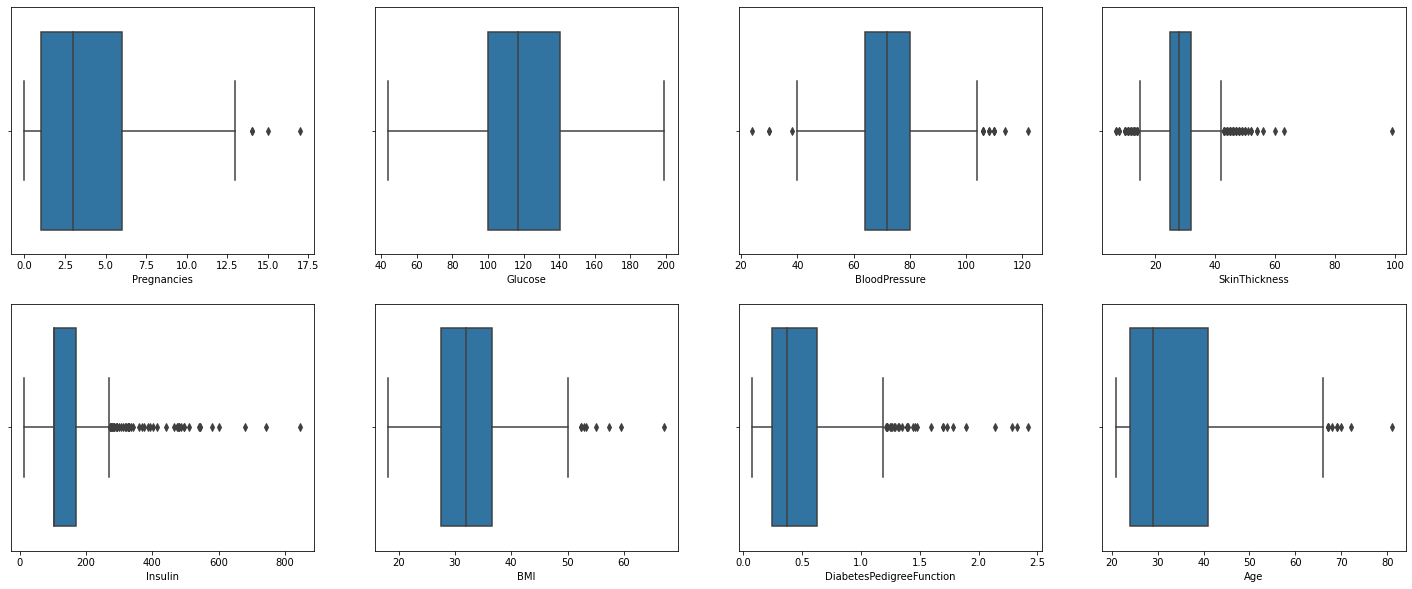

In [ ]:
plt.figure(figsize=(25,10))
for i,col in enumerate(df.drop(columns=['Outcome']).columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[col])

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [ ]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
SkinThickness no
Insulin yes
Insulin no
BMI no
DiabetesPedigreeFunction yes
DiabetesPedigreeFunction no
Age no
Outcome no


In [ ]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df, df.columns)

In [ ]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


# Visualization

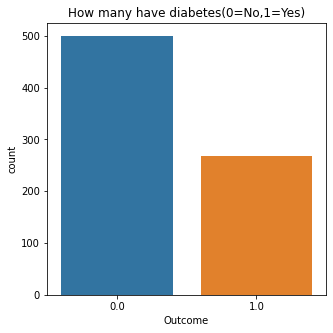

In [ ]:
plt.figure(figsize=(5,5))
plt.title('How many have diabetes(0=No,1=Yes)')
locs, labels = plt.xticks()
sns.countplot(df['Outcome'])

In [ ]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [ ]:
df["Outcome"].value_counts() * 100 / len(df) 

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

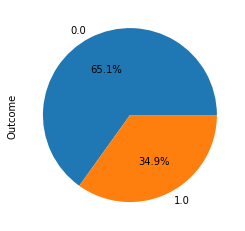

In [ ]:
df["Outcome"].value_counts().plot.pie(autopct = "%1.1f%%")

Bar

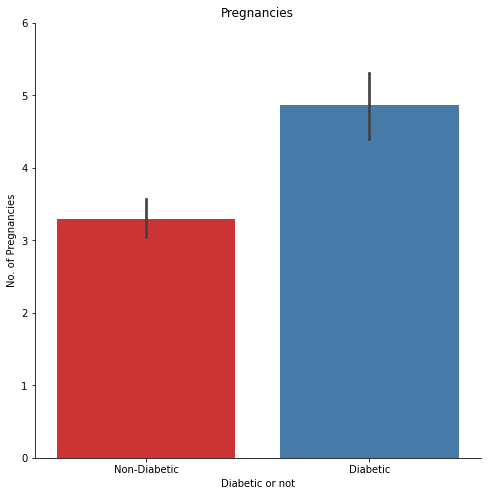

In [ ]:
#EDA
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='Pregnancies',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,6)
plt.xlabel('Diabetic or not')
plt.ylabel('No. of Pregnancies')
plt.title("Pregnancies")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

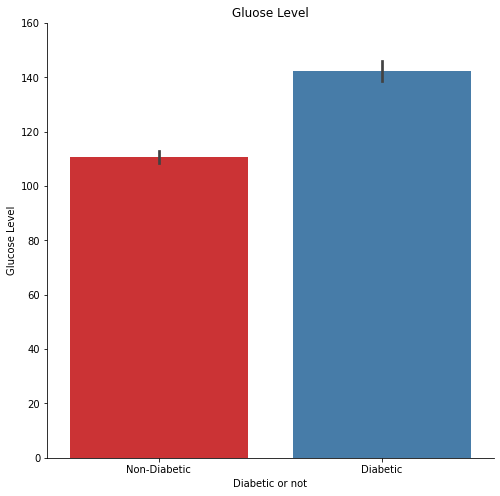

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='Glucose',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,160)
plt.xlabel('Diabetic or not')
plt.ylabel('Glucose Level')
plt.title("Gluose Level")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(0.5, 1.0, 'Blood Pressure Level')

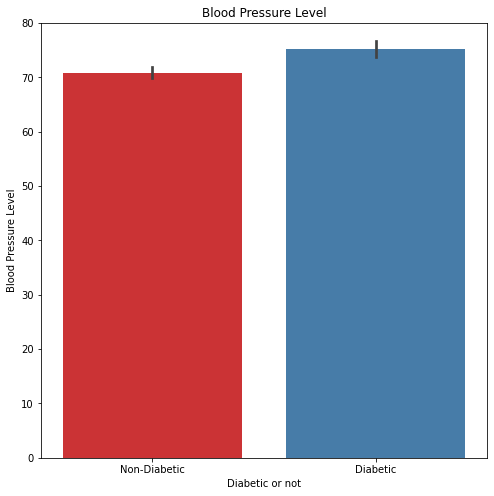

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='BloodPressure',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,80)
plt.xlabel('Diabetic or not')
plt.ylabel('Blood Pressure Level')
plt.title("Blood Pressure Level")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

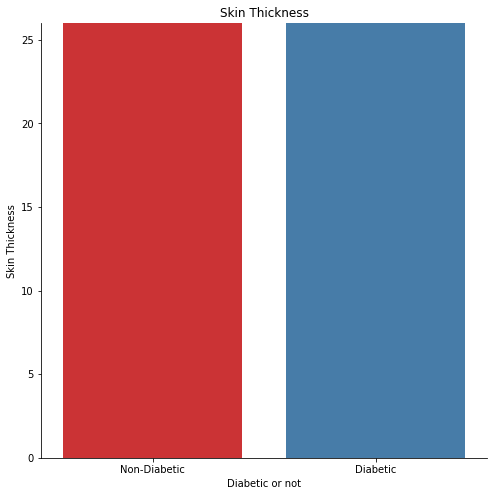

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='SkinThickness',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,26)
plt.xlabel('Diabetic or not')
plt.ylabel('Skin Thickness')
plt.title("Skin Thickness")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

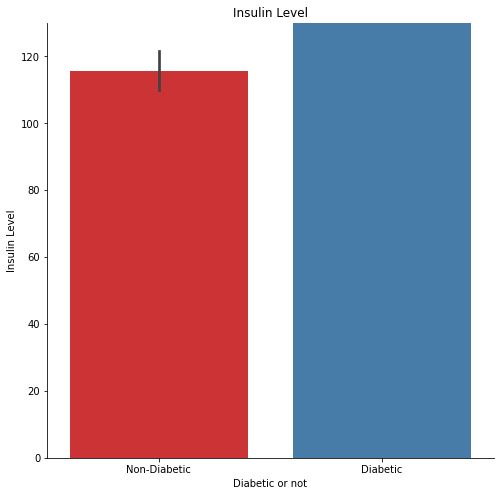

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='Insulin',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,130)
plt.xlabel('Diabetic or not')
plt.ylabel('Insulin Level')
plt.title("Insulin Level")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

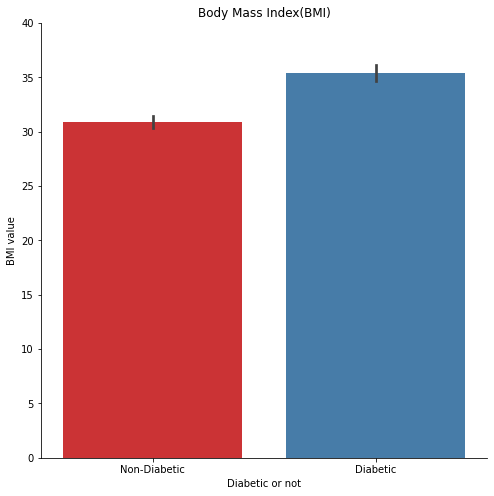

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='BMI',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,40)
plt.xlabel('Diabetic or not')
plt.ylabel('BMI value')
plt.title("Body Mass Index(BMI)")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

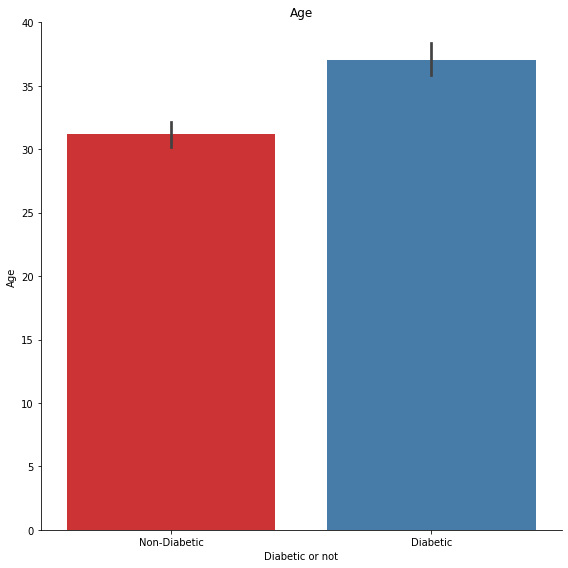

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outcome',y='Age',data=df,palette='Set1')
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.ylim(0,40)
plt.xlabel('Diabetic or not')
plt.ylabel('Age')
plt.title("Age")
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

Destiny 

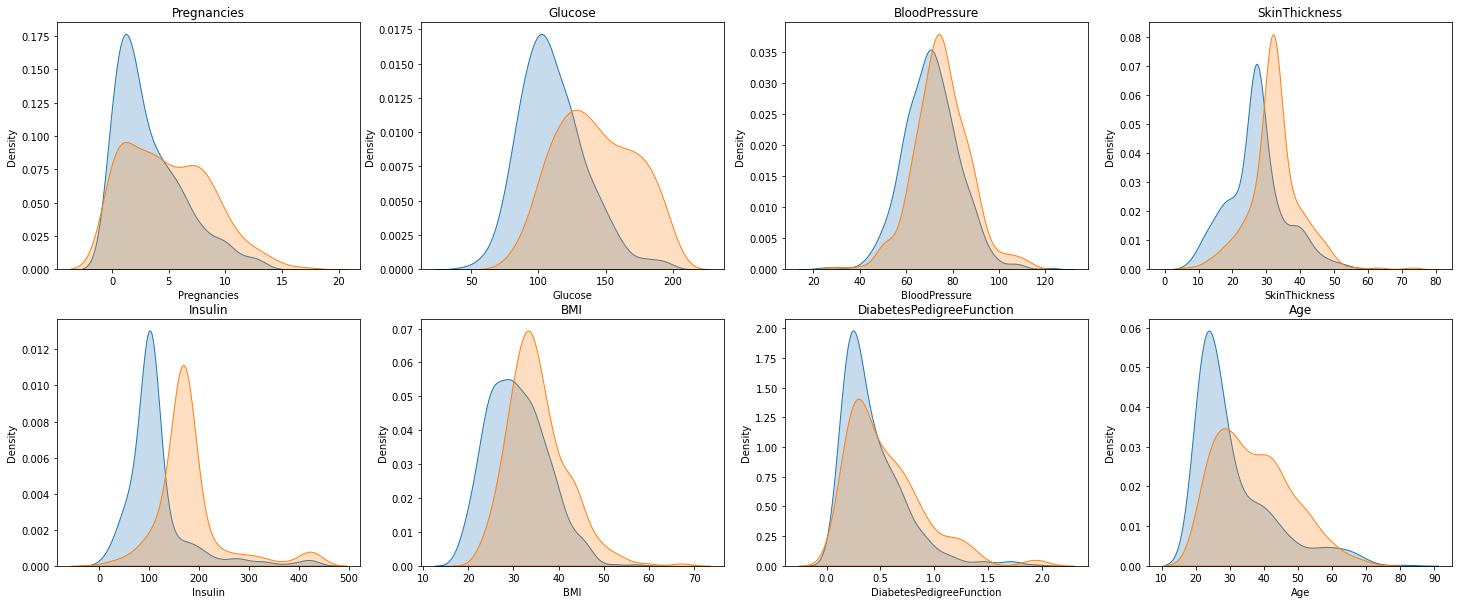

In [ ]:
plt.figure(figsize=(25,10))
for i,col in enumerate(df.drop(columns=['Outcome']).columns):
    plt.subplot(2, 4, i+1)
    #sns.kdeplot(train[col])
    gr = df.groupby('Outcome')[col]
    for label, arr in gr:
        sns.kdeplot(arr, label=label,shade=True)
    plt.title(col)

Scatter plot

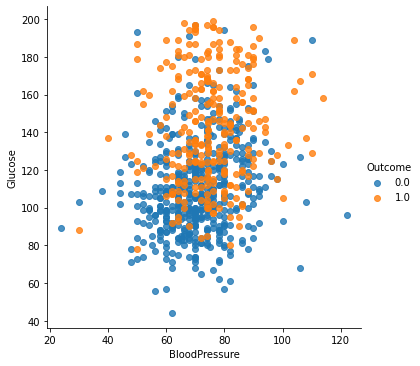

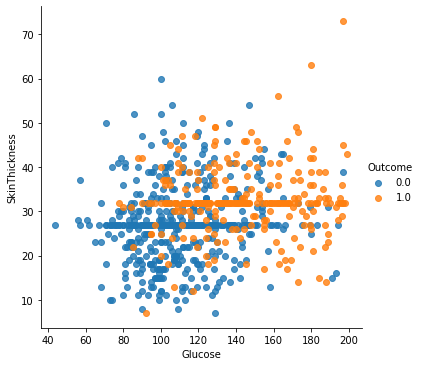

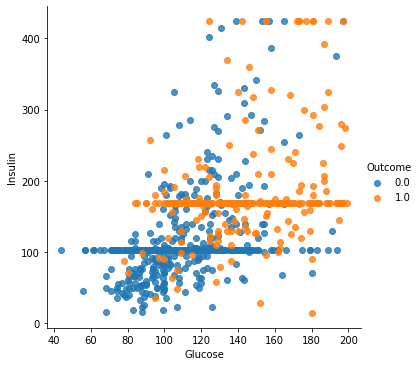

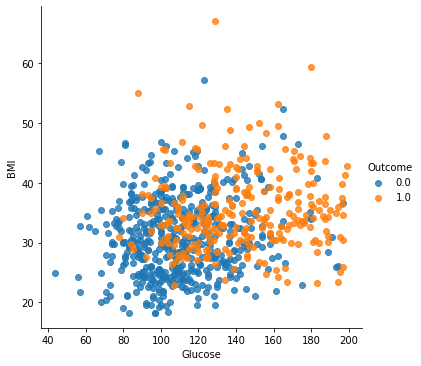

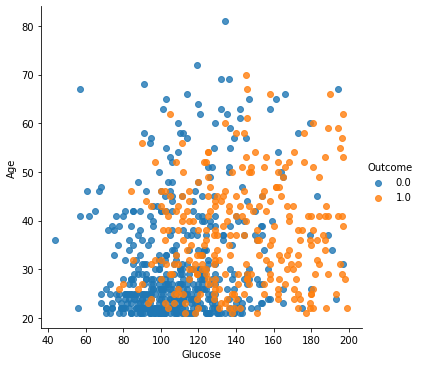

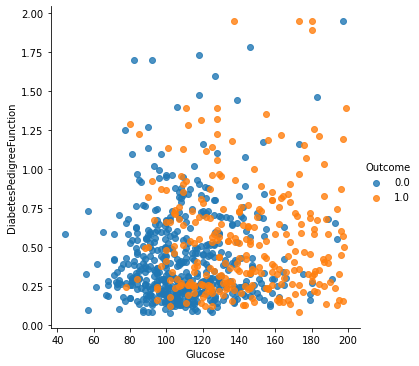

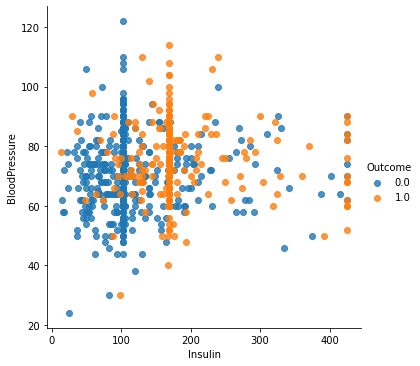

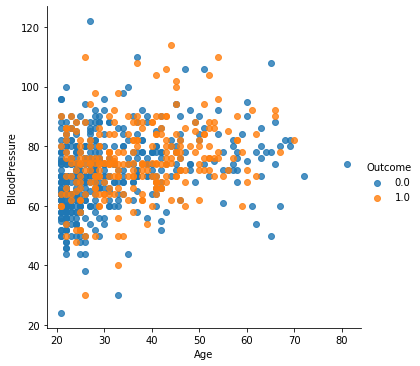

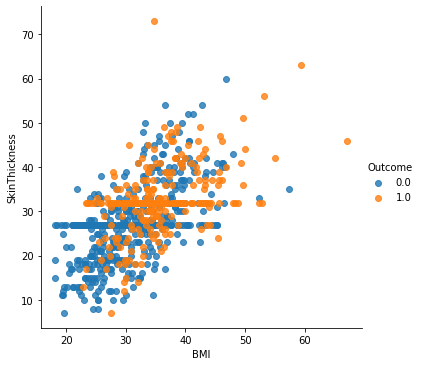

In [ ]:
# A scatter plot for show how two variables are related to each other
sns.lmplot("BloodPressure", "Glucose", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "SkinThickness", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "Insulin", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "BMI", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "Age", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "DiabetesPedigreeFunction", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Insulin","BloodPressure",df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Age", "BloodPressure", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("BMI", "SkinThickness", df, hue='Outcome', fit_reg=False, height = 5)

correlation

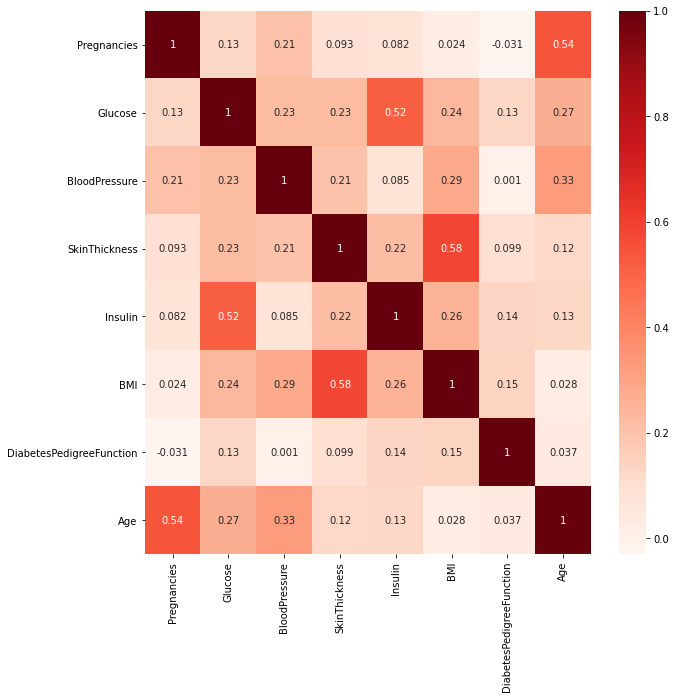

In [ ]:
m=df.loc[:,df.columns!='Outcome'].corr()
plt.figure(figsize=(10,10))
sns.heatmap(m,annot=True,cmap="Reds")

# Insights

*The greatest value of a picture is when it forces us to notice what we never expected to see*.